In [4]:
import pandas as pd 
import numpy as np 
import json 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
!pwd

/Users/alieubaldeh/Documents/Flatiron/Projects/phase_one_project/dsc-phase-1-project


In [5]:
title_basics = pd.read_csv('/Users/alieubaldeh/Documents/Flatiron/Projects/phase_one_project/dsc-phase-1-project/zippedData/Unzipped/imdb.title.basics.csv')

In [6]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
movie_gross = pd.read_csv('/Users/alieubaldeh/Documents/Flatiron/Projects/phase_one_project/dsc-phase-1-project/zippedData/Unzipped/tn.movie_budgets.csv')

In [8]:
movie_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
import random 
import requests
from bs4 import BeautifulSoup
import json

In [10]:
url = 'https://www.imdb.com/chart/top'
response = requests.get(url)

type(response.text)

str

In [7]:
#Raw html data 
#response.text

In [15]:
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
#soup

In [17]:
type(soup)

bs4.BeautifulSoup

In [18]:
movietags = soup.select('td.titleColumn')

In [10]:
#movietags[0]

Making Api Calls 

In [1]:
api_key = "69ad870bdcbbf9cc540c7a4e4d400bed"

In [13]:
response = requests.get('https://api.themoviedb.org/3/movie/550?api_key=69ad870bdcbbf9cc540c7a4e4d400bed')

In [9]:
#response.text

In [16]:
soup = BeautifulSoup(response.text, "html.parser")

In [8]:
#print(soup.prettify())

In [26]:
print(soup.children)

In [27]:
#Webscrape ESPN 


In [28]:
response2 = requests.get('https://www.espn.com/nfl/team/roster/_/name/buf')

In [29]:
response2.status_code

200

In [30]:
bills = BeautifulSoup(response2.text, 'html.parser')

In [7]:
#bills

In [39]:
type(bills)

bs4.BeautifulSoup

In [40]:
something = bills.select('id.fitt-analytics')

In [41]:
something

[]

In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
response = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [6]:
#soup

In [5]:
#print(soup.prettify())

In [4]:
#print(list(soup.children))

In [9]:
print(soup.find_all('p'))

[<p>The Top Rated Movie list only includes theatrical features.</p>, <p class="imdb-footer__copyright _2-iNNCFskmr4l2OFN2DRsf">© 1990-<!-- -->2020<!-- --> by IMDb.com, Inc.</p>]


In [3]:
#print(soup.select('td.titleColumn'))

In [11]:
movietags = soup.select('td.titleColumn')

In [14]:
movietags[0]

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>

In [1]:
inner_movietags = soup.select('td.titleColumn a')
#inner_movietags

NameError: name 'soup' is not defined

In [25]:
actors_1 = inner_movietags[0]['title']
actors_1

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [54]:
actor_list = []
for i in range(len(inner_movietags)): 
    actor_list.append([i, inner_movietags[i]['title']])

    

In [2]:
#actor_list

In [58]:
import pandas as pd 
from pandas import DataFrame


In [65]:
actors_df = DataFrame(actor_list, columns=['Director', 'Starting 1'])

In [67]:
actors_df

,Director,Starting 1
0,0,"Frank Darabont (dir.), Tim Robbins, Morgan Fre..."
1,1,"Francis Ford Coppola (dir.), Marlon Brando, Al..."
2,2,"Francis Ford Coppola (dir.), Al Pacino, Robert..."
3,3,"Christopher Nolan (dir.), Christian Bale, Heat..."
4,4,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"
...,...,...
245,245,"Gillo Pontecorvo (dir.), Brahim Hadjadj, Jean ..."
246,246,"James Cameron (dir.), Arnold Schwarzenegger, L..."
247,247,"Naoko Yamada (dir.), Miyu Irino, Saori Hayami"
248,248,"Zaza Urushadze (dir.), Lembit Ulfsak, Elmo Nüg..."


In [28]:
movie_title_1 = inner_movietags[0].text
movie_title_1

'The Shawshank Redemption'

In [17]:
year = soup.select('span.secondaryInfo')

In [30]:
year_one = year[0].text

In [31]:
year_one

'(1994)'

In [43]:
rating_tags = soup.select('td.posterColumn span[name=ir]')

In [49]:
rating_tags[0]['data-value']

'9.222805040597486'

In [50]:
ratings_list = []

250

In [13]:
import requests 
import json
import pandas as pd

In [14]:
movie_db = requests.get('https://api.themoviedb.org/3/movie/550?api_key=69ad870bdcbbf9cc540c7a4e4d400bed')

In [15]:
movie_db.status_code

200

In [16]:
movie_db = json.loads(movie_db.text)

In [17]:
#movie_db

In [18]:
# for key in movie_db.keys(): 
#     print(key)

In [19]:
movie_title = movie_db['title']
movie_title

'Fight Club'

In [20]:
flight_club_info = {'title': movie_db['title'], 'budget': movie_db['budget'], 'revenue': movie_db['revenue'], 'popularity': movie_db['popularity']}

In [21]:
flight_club_info

{'title': 'Fight Club',
 'budget': 63000000,
 'revenue': 100853753,
 'popularity': 36.25}

In [22]:
pd.DataFrame.from_dict(flight_club_info, orient='index')

,0
title,Fight Club
budget,63000000
revenue,100853753
popularity,36.25


Top Rated Movies

In [23]:
top_rated = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=69ad870bdcbbf9cc540c7a4e4d400bed&language=en-US&page=1')

In [90]:
#top-rated.status_code 
#top_rated.text

In [27]:
top_rated_json = json.loads(top_rated.text)


In [28]:
top_rated_json.keys()

dict_keys(['page', 'total_results', 'total_pages', 'results'])

In [40]:
top_rated_json

{'page': 1,
 'total_results': 7977,
 'total_pages': 399,
 'results': [{'popularity': 9.567,
   'id': 724089,
   'video': False,
   'vote_count': 924,
   'vote_average': 8.9,
   'title': "Gabriel's Inferno Part II",
   'release_date': '2020-07-31',
   'original_language': 'en',
   'original_title': "Gabriel's Inferno Part II",
   'genre_ids': [10749],
   'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
   'adult': False,
   'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
   'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'},
  {'popularity': 10.597,
   'vote_count': 1541,
   'video': False,
   'poster_path': '/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg',
   'id': 696374,
   'adult': False,
   'backdrop_path': '/96

In [29]:
len(top_rated_json)

4

In [30]:
top_movies = top_rated_json['results']

In [39]:
top_rated_json['page']

1

In [31]:
len(top_movies)

20

In [32]:
top_movies = pd.DataFrame(top_rated_json['results'])

In [41]:
top_movies

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,9.567,724089,False,924,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,10.597,696374,False,1541,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,19.288,644479,False,257,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,55.873,278,False,17496,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,12.878,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg
5,41.016,238,False,13239,8.7,The Godfather,1972-03-14,en,The Godfather,"[18, 80]",/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,False,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg
6,34.175,424,False,10535,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[18, 36, 10752]",/loRmRzQXZeqG78TqZuyvSlEQfZb.jpg,False,The true story of how businessman Oskar Schind...,/c8Ass7acuOe4za6DhSattE359gr.jpg
7,127.751,372058,False,6602,8.6,Your Name.,2016-08-26,ja,君の名は。,"[10749, 16, 18]",/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,False,High schoolers Mitsuha and Taki are complete s...,/q719jXXEzOoYaps6babgKnONONX.jpg
8,30.941,240,False,7858,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[18, 80]",/poec6RqOKY9iSiIUmfyfPfiLtvB.jpg,False,In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg
9,54.105,129,False,10377,8.5,Spirited Away,2001-07-20,ja,千と千尋の神隠し,"[16, 10751, 14]",/mSDsSDwaP3E7dEfUPWy4J0djt4O.jpg,False,"A young girl, Chihiro, becomes trapped in a st...",/2TeJfUZMGolfDdW6DKhfIWqvq8y.jpg


In [54]:
new_movies_df = top_movies[(top_movies['release_date'].str.startswith('201'))]

In [55]:
new_movies_df

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
2,19.288,644479,False,257,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
7,127.751,372058,False,6602,8.6,Your Name.,2016-08-26,ja,君の名は。,"[10749, 16, 18]",/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,False,High schoolers Mitsuha and Taki are complete s...,/q719jXXEzOoYaps6babgKnONONX.jpg
10,113.512,496243,False,9683,8.5,Parasite,2019-05-30,ko,기생충,"[35, 53, 18]",/ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg,False,"All unemployed, Ki-taek's family takes peculia...",/7IiTTgloJzvGI1TAYymCfbfl3vT.jpg
11,293.060,592350,False,469,8.5,My Hero Academia: Heroes Rising,2019-12-20,ja,僕のヒーローアカデミア THE MOVIE ヒーローズ：ライジング,"[16, 28]",/9guoVF7zayiiUq5ulKQpt375VIy.jpg,False,Class 1-A visits Nabu Island where they finall...,/zGVbrulkupqpbwgiNedkJPyQum4.jpg
15,79.157,537061,False,494,8.5,Steven Universe: The Movie,2019-09-02,en,Steven Universe: The Movie,"[28, 12, 16, 35, 18, 14, 10402, 10751]",/re3ZvlKJg04iLpLRf1xTKHS2wLU.jpg,False,"Two years after the events of ""Change Your Min...",/8mRgpubxHqnqvENK4Bei30xMDvy.jpg


In [56]:
import matplotlib.pyplot as plt 
%matplotlib inline

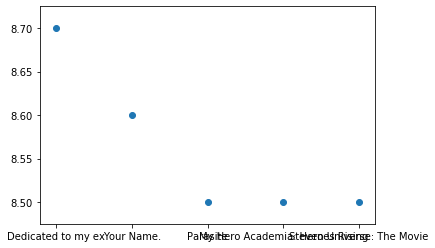

In [62]:
Y = new_movies_df.vote_average
X = new_movies_df.title

fig, ax = plt.subplots()
ax.scatter(X, Y, );

fig, ax = plt.subplots()
ax.bar(x,y, color = 'pink')
ax.set_title('average tip amount for time')
ax.set_xticks([0,1])
ax.set_xticklabels(['lunch','dinner'])

In [60]:
api_key ="69ad870bdcbbf9cc540c7a4e4d400bed"

In [61]:
response2 = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US')

NameError: name 'movie_id' is not defined